<a href="https://colab.research.google.com/github/ashutosh17dec/EECE5644-FALL-19/blob/master/MLEXAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns; sns.set()
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
import math
import warnings
warnings.filterwarnings("ignore")
from keras.engine.input_layer import Input
from keras.models import Sequential 
%matplotlib inline
import numpy as np
import pandas as pd
from keras.layers import Dense, Activation, InputLayer
from keras.utils import to_categorical
from sklearn.datasets import make_spd_matrix
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import scipy.linalg as scln
from mpl_toolkits.mplot3d import Axes3D


Using TensorFlow backend.


# **QUESTION 1:**

In [0]:
#parameter setting for the various gaussian distributions
u1=np.array([-.4,2,-3])
u2=np.array([1,1,1])
u3=np.array([1, -1.4, -2.4])
u4=np.array([-1, 1.4, -3])
t_covs = []
for s in range(4):
  t_covs.append(make_spd_matrix(3))

In [3]:
#following are the gaussian and the mean of the 4 gaussian distribution
print('1st gaussian distribution:')
print('mean: ',u1)
print('covariance matrix:')
print( t_covs[0])
print('2nd gaussian distribution:')
print('mean: ',u2)
print('covariance matrix:')
print(t_covs[1])
print('3rd gaussian distribution:')
print('mean: ',u3)
print('covariance matrix:')
print( t_covs[2])
print('4th gaussian distribution:')
print('mean: ',u4)
print('covariance matrix:')
print( t_covs[3]) 

1st gaussian distribution:
mean:  [-0.4  2.  -3. ]
covariance matrix:
[[ 0.66909434  0.31235497 -0.51570697]
 [ 0.31235497  1.67004854 -1.5412846 ]
 [-0.51570697 -1.5412846   1.82495143]]
2nd gaussian distribution:
mean:  [1 1 1]
covariance matrix:
[[ 2.01712289  0.9253348  -1.07284457]
 [ 0.9253348   1.45621849 -0.98285737]
 [-1.07284457 -0.98285737  1.67120928]]
3rd gaussian distribution:
mean:  [ 1.  -1.4 -2.4]
covariance matrix:
[[ 1.69768928  1.39739356 -0.81544361]
 [ 1.39739356  1.91770425 -0.57378817]
 [-0.81544361 -0.57378817  1.04577166]]
4th gaussian distribution:
mean:  [-1.   1.4 -3. ]
covariance matrix:
[[ 0.43211598 -0.46618691 -0.46587173]
 [-0.46618691  1.31944145  1.18034947]
 [-0.46587173  1.18034947  2.73455212]]


# Above are the four gaussian distribution

In [0]:
def randomizedsampling(n,samplesize, prob):
    a = np.random.choice(n,samplesize,p = prob)
    count = np.zeros([1,n],dtype = int)
    for i in a:
        count[0,i] = count[0,i] + 1
    return(count)

In [0]:
def multivariate_Gaussian(mean, cov, sample):
    l = scln.cholesky(cov)
    z = np.random.normal(size=(sample, cov.shape[0]))
    return (z.dot(l)+mean)

In [0]:
def plotscatter(data1,data2,data3,data4):
    fig = plt.figure(1,(20,15))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data1[:, 0], data1[:, 1], data1[:, 2], label='Class 1', marker = 'o',s=30)
    ax.scatter(data2[:, 0], data2[:, 1], data2[:, 2], label='Class 2',marker = '*', s=30)
    ax.scatter(data3[:, 0], data3[:, 1], data3[:, 2], label='Class 3',marker = '^', s=30)
    ax.scatter(data4[:, 0], data4[:, 1], data4[:, 2], label='Class 4',marker = 's', s=30)
    ax.legend()
    ax.set_xlabel('X1 dimension')
    ax.set_ylabel('X2 dimension')
    ax.set_zlabel('X3 dimension')
    ax.set_title('3D scatter plot of the dataset')
  

In [0]:
def defineDistribution(size,u1,u2,u3,u4,t_covs):
  global r1,r2,r3,r4,X,y
  prior = [.23,.32,.19,.26]
  classsize = randomizedsampling(len(prior),size,prior)
  r1= multivariate_Gaussian(u1,t_covs[0] , classsize[0,0])
  r2= multivariate_Gaussian(u2,t_covs[1] , classsize[0,1])
  r3= multivariate_Gaussian(u3,t_covs[2] , classsize[0,2])
  r4= multivariate_Gaussian(u4,t_covs[3] , classsize[0,3])
  X=np.concatenate((r1,r2,r3,r4),0)
  b=np.full((r1.shape[0],1), 0)
  c=np.full((r2.shape[0],1), 1)
  d=np.full((r3.shape[0],1), 2)
  e=np.full((r4.shape[0],1), 3)
  y=np.concatenate((b,c,d,e),0)
  plotscatter(r1,r2,r3,r4)

  

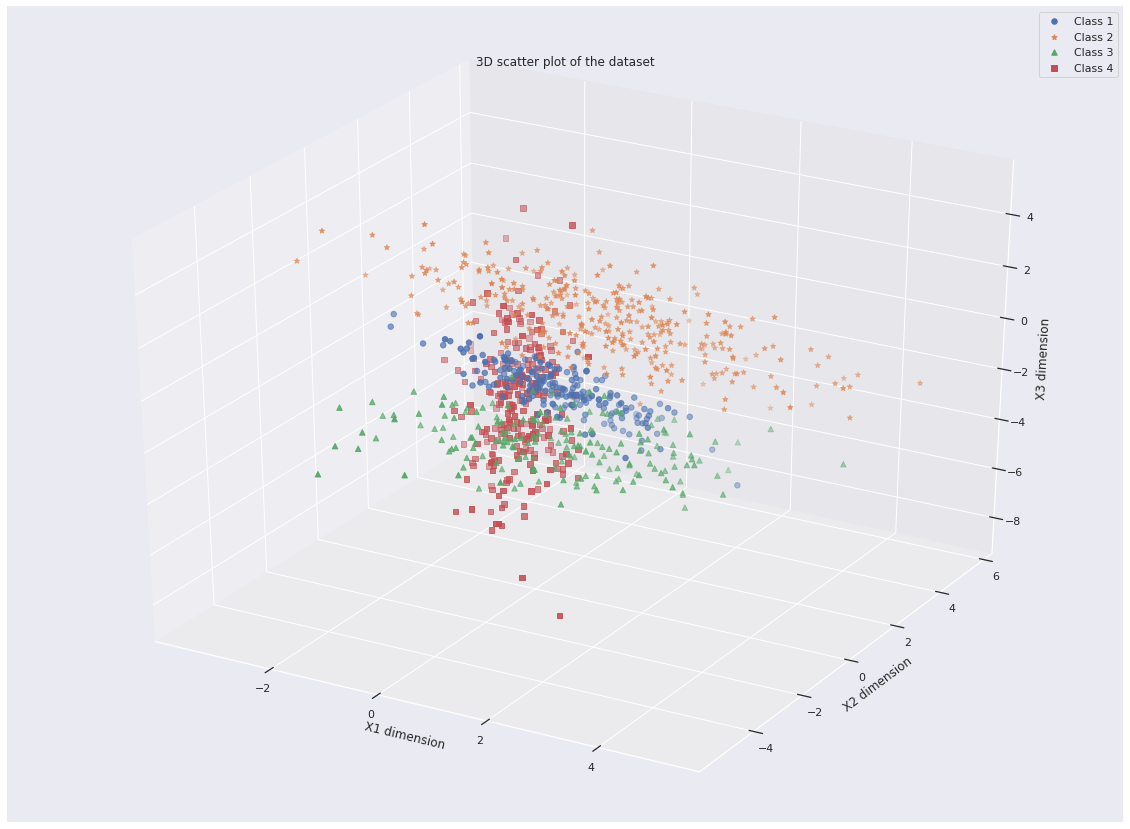

In [8]:
dataset = 1000
defineDistribution(dataset,u1,u2,u3,u4,t_covs)

# Distribution for 1000 point dataset

# ***part B***

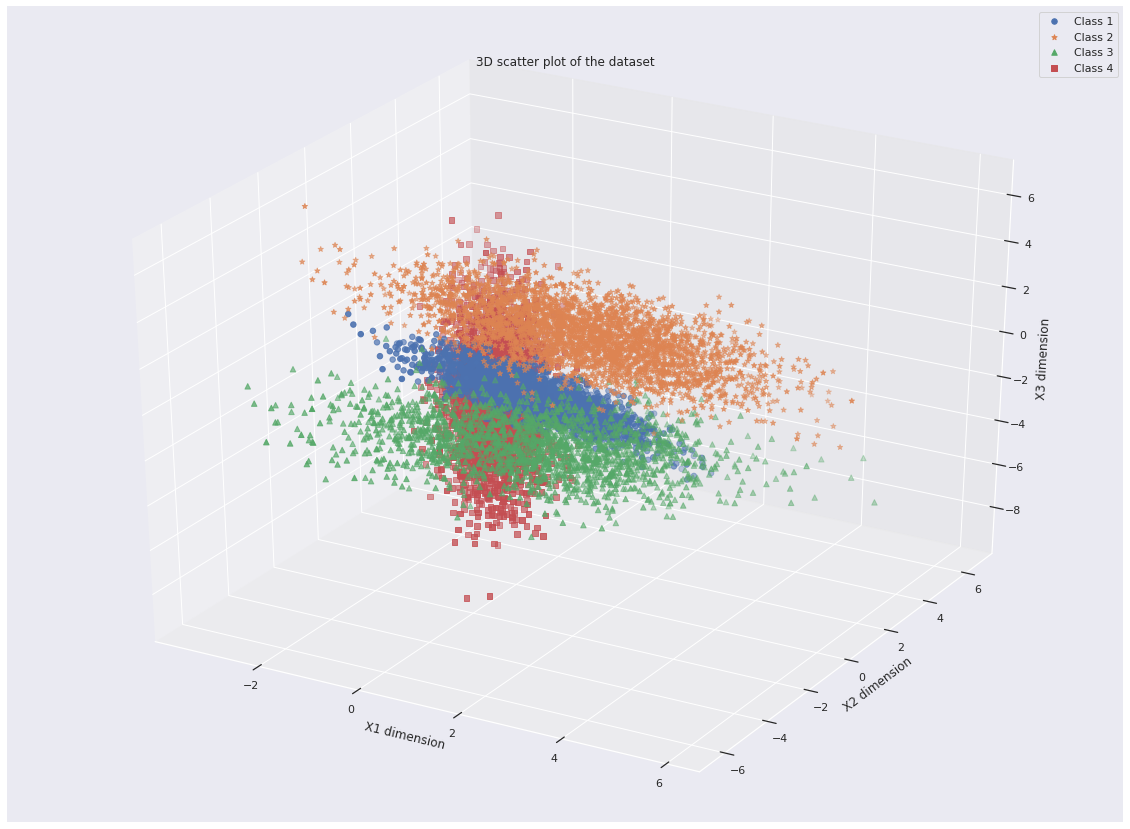

In [9]:
dataset = 10000
defineDistribution(dataset,u1,u2,u3,u4,t_covs)

# Distribution for 10000 points dataset

Text(0.5, 0.92, 'Classification according to estimator')

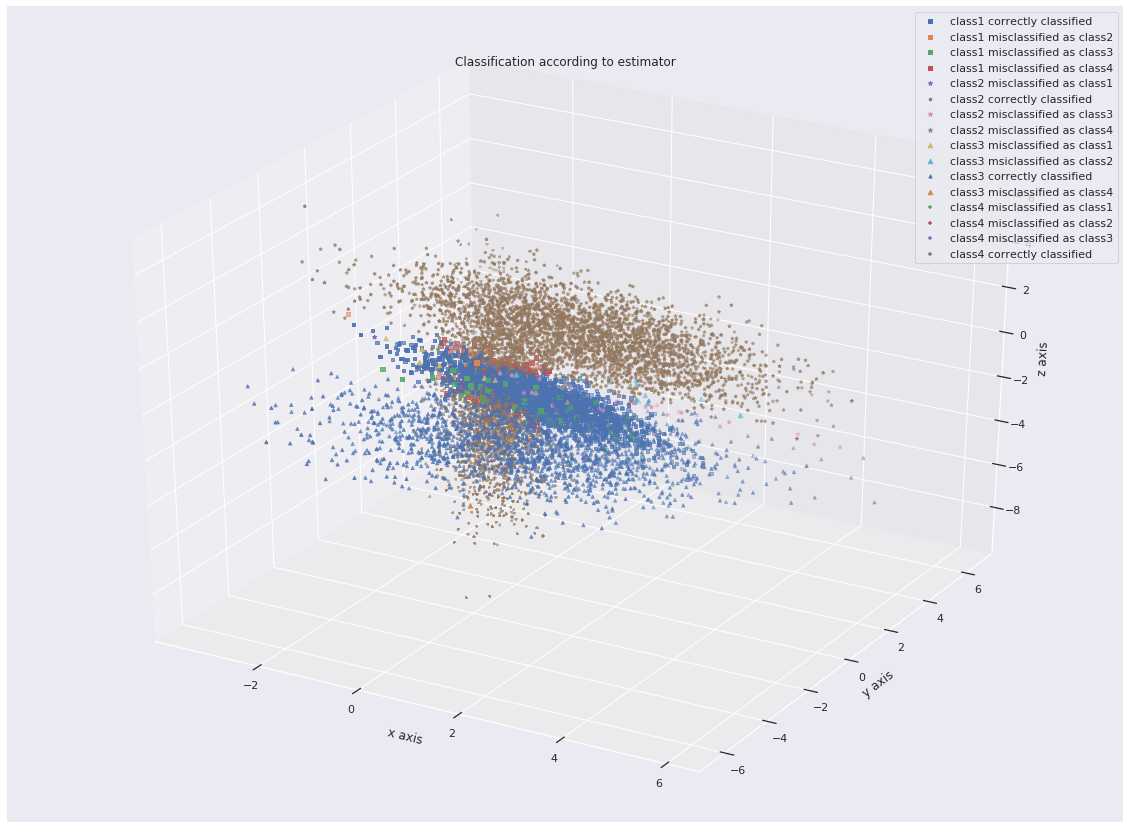

In [10]:
px = [0.19,0.21,0.36,0.24]
sigma1=np.linalg.inv(t_covs[0])
sigma2=np.linalg.inv(t_covs[1])
sigma3=np.linalg.inv(t_covs[2])
sigma4=np.linalg.inv(t_covs[3])
X_map10k=X
y_map10k=y
k_new=to_categorical(y)
#defining the w for the generator functions
W1=(-1/2)*sigma1
w1=sigma1@(u1.reshape(3,1))
w10=(-1/2)*(u1.reshape(3,1).T)@sigma1@u1.reshape(3,1)-0.5*np.log(np.linalg.det(t_covs[0]))+np.log(px[0])
W2=-0.5*sigma2
w2=sigma2@(u2.reshape(3,1))
w20=(-1/2)*(u2.reshape(3,1).T)@sigma2@u2.reshape(3,1)-0.5*np.log(np.linalg.det(t_covs[1]))+np.log(px[1])
W3=-0.5*sigma3
w3=sigma3@(u3.reshape(3,1))
w30=(-1/2)*(u3.reshape(3,1).T)@sigma3@u3.reshape(3,1)-0.5*np.log(np.linalg.det(t_covs[2]))+np.log(px[2])
W4=-0.5*sigma4
w4=sigma4@(u4.reshape(3,1))
w40=(-1/2)*(u4.reshape(3,1).T)@sigma4@u4.reshape(3,1)-0.5*np.log(np.linalg.det(t_covs[3]))+np.log(px[3])
#definig generator function
#first
g11=np.diag(r1@W1@r1.T)+w1.T@r1.T+w10
g12=np.diag(r2@W1@r2.T)+w1.T@r2.T+w10
g13=np.diag(r3@W1@r3.T)+w1.T@r3.T+w10
g14=np.diag(r4@W1@r4.T)+w1.T@r4.T+w10
#second
g21=np.diag(r1@W2@r1.T)+w2.T@r1.T+w20
g22=np.diag(r2@W2@r2.T)+w2.T@r2.T+w20
g23=np.diag(r3@W2@r3.T)+w2.T@r3.T+w20
g24=np.diag(r4@W2@r4.T)+w2.T@r4.T+w20
#third
g31=np.diag(r1@W3@r1.T)+w3.T@r1.T+w30
g32=np.diag(r2@W3@r2.T)+w3.T@r2.T+w30
g33=np.diag(r3@W3@r3.T)+w3.T@r3.T+w30
g34=np.diag(r4@W3@r4.T)+w3.T@r4.T+w30
#Fourth
g41=np.diag(r1@W4@r1.T)+w4.T@r1.T+w40
g42=np.diag(r2@W4@r2.T)+w4.T@r2.T+w40
g43=np.diag(r3@W4@r3.T)+w4.T@r3.T+w40
g44=np.diag(r4@W4@r4.T)+w4.T@r4.T+w40
#first disstribution generator function
k11=((g11>g21)&(g11>g31)&(g11>g41))
k21=((g21>g11)&(g21>g31)&(g21>g41))
k31=((g31>g21)&(g31>g11)&(g31>g41))
k41=((g41>g21)&(g41>g11)&(g41>g31))
#Second disstribution generator function
k12=((g12>g22)&(g12>g32)&(g12>g42))
k22=((g22>g12)&(g22>g32)&(g22>g42))
k32=((g32>g22)&(g32>g12)&(g32>g42))
k42=((g42>g22)&(g42>g12)&(g42>g32))
#third disstribution generator function
k13=((g13>g23)&(g13>g33)&(g13>g43))
k23=((g23>g13)&(g23>g33)&(g23>g43))
k33=((g33>g23)&(g33>g13)&(g33>g43))
k43=((g43>g23)&(g43>g13)&(g43>g33))
#fourth disstribution generator function
k14=((g14>g24)&(g14>g34)&(g14>g44))
k24=((g24>g14)&(g24>g34)&(g24>g44))
k34=((g34>g14)&(g34>g24)&(g34>g44))
k44=((g44>g14)&(g44>g24)&(g44>g34))
#to visualize classification
fig=plt.figure(2,figsize=(20,15))
ax =fig.add_subplot(111,projection='3d')
ax.scatter(r1.T[0,np.where(k11)[1]],r1.T[1,np.where(k11)[1]],r1.T[2,np.where(k11)[1]],marker = 's',s=10,label="class1 correctly classified")
ax.scatter(r1.T[0,np.where(k21)[1]],r1.T[1,np.where(k21)[1]],r1.T[2,np.where(k21)[1]],marker = 's',label="class1 misclassified as class2")
ax.scatter(r1.T[0,np.where(k31)[1]],r1.T[1,np.where(k31)[1]],r1.T[2,np.where(k31)[1]],marker = 's',label="class1 misclassified as class3")
ax.scatter(r1.T[0,np.where(k41)[1]],r1.T[1,np.where(k41)[1]],r1.T[2,np.where(k41)[1]],marker = 's',label="class1 misclassified as class4")
ax.scatter(r2.T[0,np.where(k12)[1]],r2.T[1,np.where(k12)[1]],r2.T[2,np.where(k12)[1]],marker = '*',label="class2 misclassified as class1")
ax.scatter(r2.T[0,np.where(k22)[1]],r2.T[1,np.where(k22)[1]],r2.T[2,np.where(k22)[1]],marker = '*',s=10,label="class2 correctly classified")
ax.scatter(r2.T[0,np.where(k32)[1]],r2.T[1,np.where(k32)[1]],r2.T[2,np.where(k32)[1]],marker = '*',label="class2 misclassified as class3")
ax.scatter(r2.T[0,np.where(k42)[1]],r2.T[1,np.where(k42)[1]],r2.T[2,np.where(k42)[1]],marker = '*',label="class2 misclassified as class4")
ax.scatter(r3.T[0,np.where(k13)[1]],r3.T[1,np.where(k13)[1]],r3.T[2,np.where(k13)[1]],marker = '^',label="class3 misclassified as class1")
ax.scatter(r3.T[0,np.where(k23)[1]],r3.T[1,np.where(k23)[1]],r3.T[2,np.where(k23)[1]],marker = '^',label="class3 msiclassified as class2")
ax.scatter(r3.T[0,np.where(k33)[1]],r3.T[1,np.where(k33)[1]],r3.T[2,np.where(k33)[1]],marker = '^',s=10,label="class3 correctly classified")
ax.scatter(r3.T[0,np.where(k43)[1]],r3.T[1,np.where(k43)[1]],r3.T[2,np.where(k43)[1]],marker = '^',label="class3 misclassified as class4")
ax.scatter(r4.T[0,np.where(k14)[1]],r4.T[1,np.where(k14)[1]],r4.T[2,np.where(k14)[1]],marker = '+',label="class4 misclassified as class1")
ax.scatter(r4.T[0,np.where(k24)[1]],r4.T[1,np.where(k24)[1]],r4.T[2,np.where(k24)[1]],marker = '+',label="class4 misclassified as class2")
ax.scatter(r4.T[0,np.where(k34)[1]],r4.T[1,np.where(k34)[1]],r4.T[2,np.where(k34)[1]],marker = '+',label="class4 misclassified as class3")
ax.scatter(r4.T[0,np.where(k44)[1]],r4.T[1,np.where(k44)[1]],r4.T[2,np.where(k44)[1]],s=10,marker = '+',label="class4 correctly classified")
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.legend(loc='best')
ax.set_title('Classification according to estimator')

Text(0.5, 0.92, 'Correctly classified')

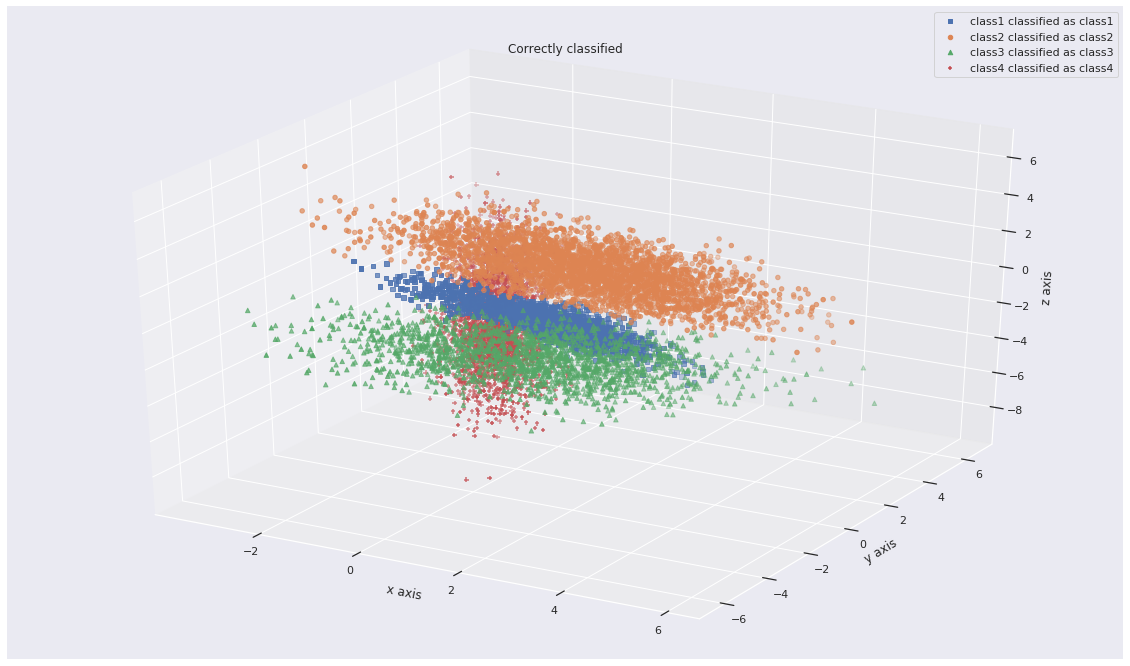

In [11]:
#To visualize correclty classified points
fig=plt.figure(figsize=(20,12))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(r1.T[0,np.where(k11)[1]],r1.T[1,np.where(k11)[1]],r1.T[2,np.where(k11)[1]],s = 20,marker = 's',label="class1 classified as class1")
ax.scatter(r2.T[0,np.where(k22)[1]],r2.T[1,np.where(k22)[1]],r2.T[2,np.where(k22)[1]],s = 20,marker = 'o',label="class2 classified as class2")
ax.scatter(r3.T[0,np.where(k33)[1]],r3.T[1,np.where(k33)[1]],r3.T[2,np.where(k33)[1]],s = 20,marker = '^',label="class3 classified as class3")
ax.scatter(r4.T[0,np.where(k44)[1]],r4.T[1,np.where(k44)[1]],r4.T[2,np.where(k44)[1]],s = 20,marker = '+',label="class4 classified as class4")
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.legend(loc='best')
ax.set_title('Correctly classified')

# PROBABILITY OF ERROR FOR THE ABOVE ESTIMATOR IS BELOW

In [12]:
#probability of error for the above classifier
print('Number of misclassified samples are {}'.format(10000-(k11.sum()+k22.sum()+k33.sum()+k44.sum())))
print("Probability of error is {}".format(1-((k11.sum()+k22.sum()+k33.sum()+k44.sum())/10000))) 

Number of misclassified samples are 911
Probability of error is 0.09109999999999996


# ***PART C***

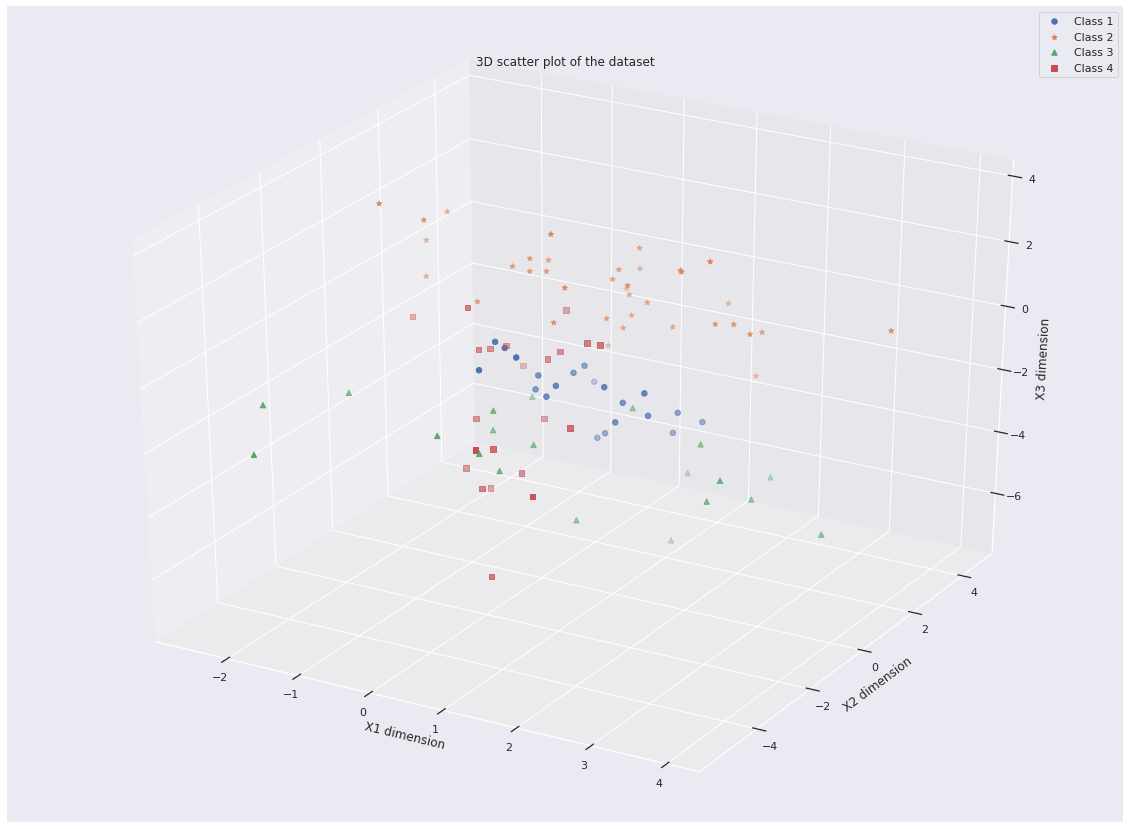

In [13]:
datasize = 100
defineDistribution(datasize,u1,u2,u3,u4,t_covs)

In [0]:
def baseline_model(i=0):
  model = Sequential() 
  model.add(Dense(i, input_shape=(3,), activation='relu'))
  model.add(Dense(4, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
  return model
  model.summary()

In [15]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=5, verbose=0)
i=[12,15,18,21,24,27,30,33]
param_grid = dict(i=i)
kfold = KFold(n_splits=10, shuffle=True)
k=to_categorical(y)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=kfold,n_jobs=-1)
grid_result = grid.fit(X, k)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Best: 0.850000 using {'i': 27}
0.760000 (0.149666) with: {'i': 12}
0.830000 (0.100499) with: {'i': 15}
0.820000 (0.074833) with: {'i': 18}
0.810000 (0.030000) with: {'i': 21}
0.810000 (0.144568) with: {'i': 24}
0.850000 (0.092195) with: {'i': 27}
0.840000 (0.111355) with: {'i': 30}
0.820000 (0.040000) with: {'i': 33}


In [0]:
def baseline_model2(bestparam): 
  model = Sequential() 
  model.add(Dense(bestparam, input_shape=(3,), activation='relu'))
  model.add(Dense(4, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
  model.fit(X,k,epochs=100)
  _, accuracy=model.evaluate(X_map10k, k_new)
  return accuracy

In [17]:
accur = baseline_model2(grid_result.best_params_['i'])

Epoch 1/100
100/100 [==============================] - 0s 2ms/step - loss: 1.4650 - acc: 0.2300
Epoch 2/100
100/100 [==============================] - 0s 281us/step - loss: 1.3994 - acc: 0.2500
Epoch 3/100
100/100 [==============================] - 0s 199us/step - loss: 1.3358 - acc: 0.3200
Epoch 4/100
100/100 [==============================] - 0s 217us/step - loss: 1.2789 - acc: 0.3500
Epoch 5/100
100/100 [==============================] - 0s 197us/step - loss: 1.2345 - acc: 0.3500
Epoch 6/100
100/100 [==============================] - 0s 215us/step - loss: 1.1900 - acc: 0.3800
Epoch 7/100
100/100 [==============================] - 0s 213us/step - loss: 1.1533 - acc: 0.4700
Epoch 8/100
100/100 [==============================] - 0s 199us/step - loss: 1.1167 - acc: 0.5000
Epoch 9/100
100/100 [==============================] - 0s 202us/step - loss: 1.0864 - acc: 0.5700
Epoch 10/100
100/100 [==============================] - 0s 208us/step - loss: 1.0534 - acc: 0.6400
Epoch 11/100
100/100 

# PROBABILITY OF ERROR :

In [18]:
print("probability of error in case 1 is given by {}".format(1-accur))

probability of error in case 1 is given by 0.14100000000000001


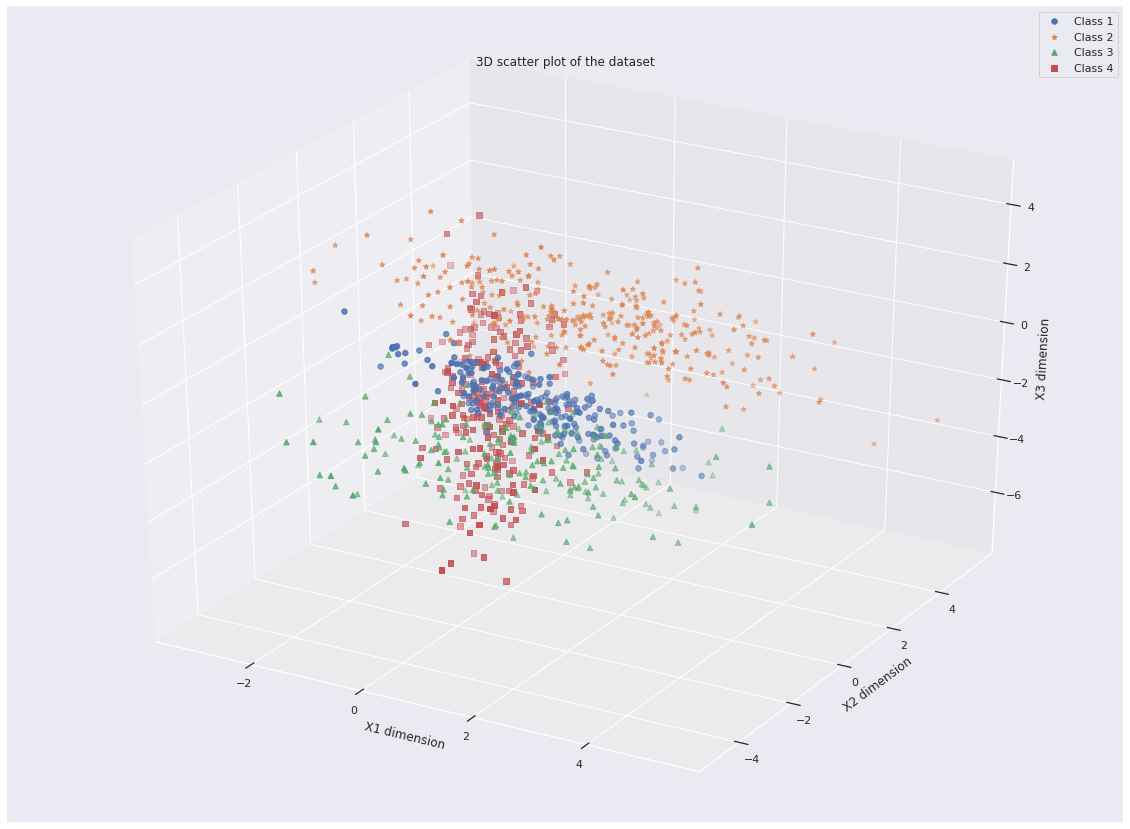

In [19]:
dataSize = 1000
defineDistribution(dataSize,u1,u2,u3,u4,t_covs)

In [20]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=100, verbose=0)
i=[12,15,18,21,24,27,30,33]
param_grid = dict(i=i)
kfold = KFold(n_splits=10, shuffle=True)
k=to_categorical(y)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=kfold,n_jobs=-1)
grid_result = grid.fit(X, k)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.781000 using {'i': 27}
0.661000 (0.097206) with: {'i': 12}
0.747000 (0.061164) with: {'i': 15}
0.717000 (0.101592) with: {'i': 18}
0.759000 (0.071337) with: {'i': 21}
0.780000 (0.061968) with: {'i': 24}
0.781000 (0.076217) with: {'i': 27}
0.775000 (0.057315) with: {'i': 30}
0.752000 (0.081829) with: {'i': 33}


In [21]:
accur = baseline_model2(grid_result.best_params_['i'])

Epoch 1/100
1000/1000 [==============================] - 0s 319us/step - loss: 1.4868 - acc: 0.2370
Epoch 2/100
1000/1000 [==============================] - 0s 124us/step - loss: 1.0635 - acc: 0.5140
Epoch 3/100
1000/1000 [==============================] - 0s 126us/step - loss: 0.8666 - acc: 0.6840
Epoch 4/100
1000/1000 [==============================] - 0s 134us/step - loss: 0.7430 - acc: 0.7790
Epoch 5/100
1000/1000 [==============================] - 0s 131us/step - loss: 0.6589 - acc: 0.8170
Epoch 6/100
1000/1000 [==============================] - 0s 147us/step - loss: 0.5987 - acc: 0.8370
Epoch 7/100
1000/1000 [==============================] - 0s 148us/step - loss: 0.5541 - acc: 0.8400
Epoch 8/100
1000/1000 [==============================] - 0s 141us/step - loss: 0.5203 - acc: 0.8450
Epoch 9/100
1000/1000 [==============================] - 0s 148us/step - loss: 0.4935 - acc: 0.8470
Epoch 10/100
1000/1000 [==============================] - 0s 128us/step - loss: 0.4717 - acc: 0.8500

# PROBABILITY OF ERROR FOR CASE 2:

In [22]:
print("probability of error in the case 2 is given by {}".format(1-accur))

probability of error in the case 2 is given by 0.1069


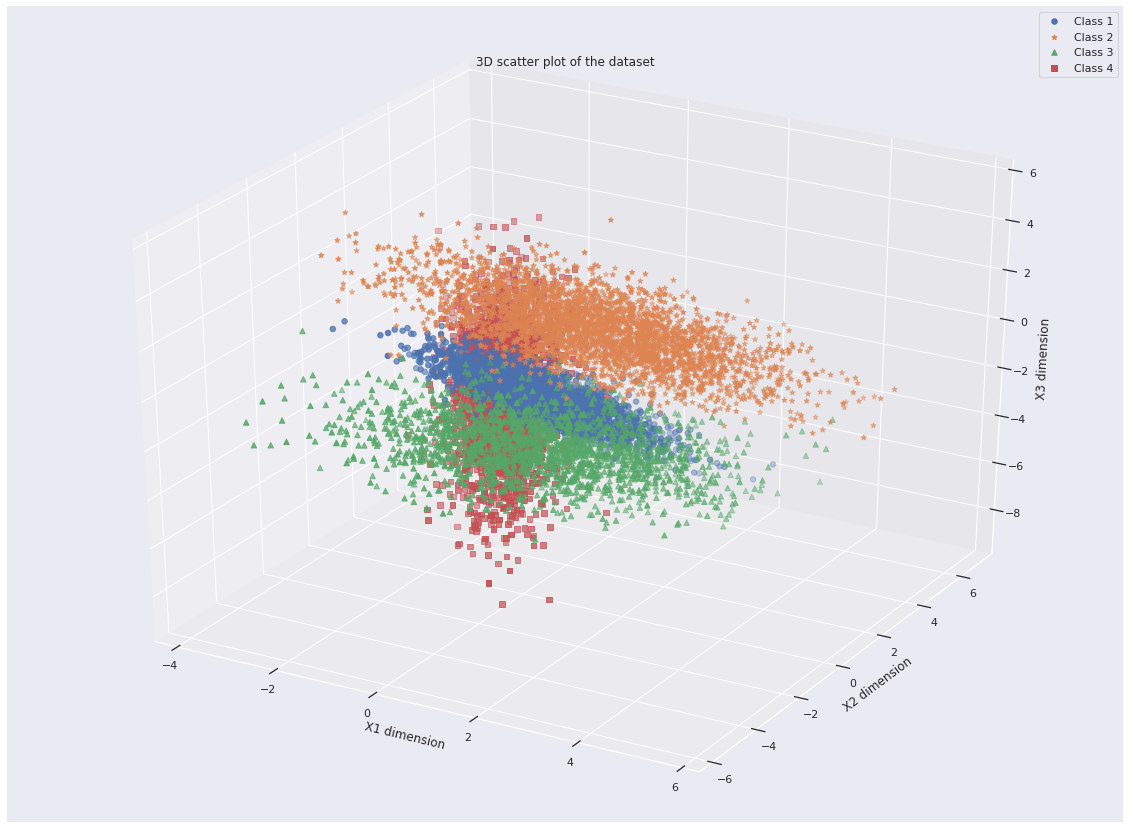

In [23]:
datasize = 10000
defineDistribution(datasize,u1,u2,u3,u4,t_covs)

In [24]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=100, verbose=0)
i=[12,15,18,21,24,27,30,33]
param_grid = dict(i=i)
kfold = KFold(n_splits=10, shuffle=True)
k=to_categorical(y)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=kfold,n_jobs=-1)
grid_result = grid.fit(X, k)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.874200 using {'i': 30}
0.869100 (0.011068) with: {'i': 12}
0.868700 (0.015093) with: {'i': 15}
0.868100 (0.009782) with: {'i': 18}
0.871000 (0.009726) with: {'i': 21}
0.872100 (0.010416) with: {'i': 24}
0.869900 (0.010616) with: {'i': 27}
0.874200 (0.011839) with: {'i': 30}
0.871500 (0.010632) with: {'i': 33}


In [25]:
accur = baseline_model2(grid_result.best_params_['i'])

Epoch 1/100
10000/10000 [==============================] - 2s 156us/step - loss: 0.6996 - acc: 0.7878
Epoch 2/100
10000/10000 [==============================] - 1s 134us/step - loss: 0.4171 - acc: 0.8578
Epoch 3/100
10000/10000 [==============================] - 1s 126us/step - loss: 0.3592 - acc: 0.8626
Epoch 4/100
10000/10000 [==============================] - 1s 118us/step - loss: 0.3304 - acc: 0.8680
Epoch 5/100
10000/10000 [==============================] - 1s 119us/step - loss: 0.3120 - acc: 0.8716
Epoch 6/100
10000/10000 [==============================] - 1s 119us/step - loss: 0.2982 - acc: 0.8755
Epoch 7/100
10000/10000 [==============================] - 1s 124us/step - loss: 0.2876 - acc: 0.8779
Epoch 8/100
10000/10000 [==============================] - 1s 119us/step - loss: 0.2789 - acc: 0.8804
Epoch 9/100
10000/10000 [==============================] - 1s 127us/step - loss: 0.2711 - acc: 0.8808
Epoch 10/100
10000/10000 [==============================] - 1s 128us/step - loss: 

# PROBABILITY OF ERROR:

In [26]:
print("probability of error in the case 3 is given by {}".format(1-accur))

probability of error in the case 3 is given by 0.08979999999999999


## **QUESTION 2** 

In [0]:
mean1 = [-8, -1]
mean2 = [0, 0]
mean3 = [8, 2]
eig_val = np.array([[3.2*2, 0], [0, 0.6*2]])
eig_vec1 = np.array([[1, -1], [1, 1]])/math.sqrt(2)
eig_vec2 = np.array([[1, 0], [0, 1]])
eig_vec3 = np.array([[1, -1], [1, 1]])/math.sqrt(2)
cov1 = np.matmul(eig_vec1, np.matmul(eig_val, eig_vec1.T))
cov2 = np.matmul(eig_vec2, np.matmul(eig_val, eig_vec2.T))
cov3 = np.matmul(eig_vec3, np.matmul(eig_val, eig_vec3.T))
p1 = 0.33
p2 = 0.38
p3 = 0.29
prior1=[p1,p2,p3]
size=1000
Classsize = randomizedsampling(len(prior1),size,prior1)
r1= multivariate_Gaussian(mean1,cov1 , Classsize[0,0])
r2= multivariate_Gaussian(mean2,cov2 , Classsize[0,1])
r3= multivariate_Gaussian(mean3,cov3 , Classsize[0,2])
X_1=np.concatenate((r1,r2,r3),0)
size=10000
classsize1 = randomizedsampling(len(prior1),size,prior1)
r11= multivariate_Gaussian(mean1,cov1 , classsize1[0,0])
r12= multivariate_Gaussian(mean2,cov2 , classsize1[0,1])
r13= multivariate_Gaussian(mean3,cov3 , classsize1[0,2])
X_2=np.concatenate((r11,r12,r13),0)

In [0]:
def ploting_data(data,Q):
  plt.figure(figsize=(9,9))
  plt.scatter(data.T[0,:],data.T[1,:],label='data points',color='purple')
  plt.axis('equal')
  plt.title(Q)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend(loc='upper left')
  plt.show()

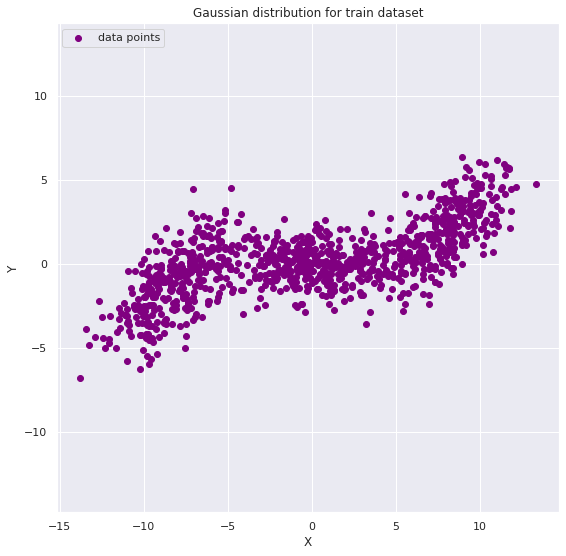

In [29]:
# generating the train data
ploting_data(X_1,"Gaussian distribution for train dataset")

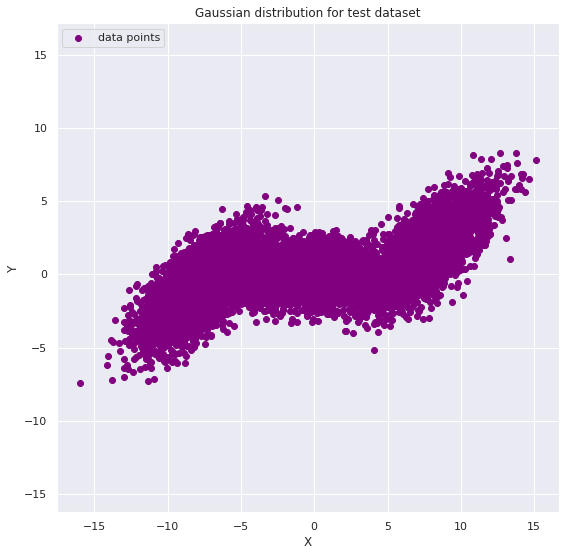

In [30]:
# generating the test data 
ploting_data(X_2,"Gaussian distribution for test dataset")

In [0]:
def baseModel(i=0,activation='softplus'):
  model = Sequential() 
  model.add(Dense(i, input_dim=1, activation=activation))
  model.add(Dense(1, activation='linear'))
  model.compile(optimizer='adam', loss='mean_squared_error') 
  return model

In [32]:
estimator=KerasRegressor(build_fn=baseModel,epochs=50, batch_size=100, verbose=0)
i=[12,15,18,21,24,27,30,33]
activation=['sigmoid','softplus']
param_grid = dict(i=i,activation=activation)
kfold = KFold(n_splits=10, shuffle=True)
grid = GridSearchCV(estimator, param_grid=param_grid, cv=kfold,n_jobs=-1)
grid_result = grid.fit(X_1[:,0],X_1[:,1])
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -2.395496 using {'activation': 'softplus', 'i': 27}


In [33]:
bestparameter = grid_result.best_params_
model = Sequential() 
model.add(Dense(bestparameter['i'], input_dim=1, activation=bestparameter['activation']))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_1[:,0],X_1[:,1],epochs=10)
loss=model.evaluate(X_2[:,0],X_2[:,1])
predict=model.predict(X_2[:,0])
print(loss)

Epoch 1/10
1000/1000 [==============================] - 1s 501us/step - loss: 2.7760
Epoch 2/10
1000/1000 [==============================] - 0s 131us/step - loss: 2.4367
Epoch 3/10
1000/1000 [==============================] - 0s 155us/step - loss: 2.4267
Epoch 4/10
1000/1000 [==============================] - 0s 137us/step - loss: 2.4269
Epoch 5/10
1000/1000 [==============================] - 0s 150us/step - loss: 2.4201
Epoch 6/10
1000/1000 [==============================] - 0s 134us/step - loss: 2.4186
Epoch 7/10
1000/1000 [==============================] - 0s 141us/step - loss: 2.4136
Epoch 8/10
1000/1000 [==============================] - 0s 128us/step - loss: 2.4228
Epoch 9/10
1000/1000 [==============================] - 0s 133us/step - loss: 2.4092
Epoch 10/10
10000/10000 [==============================] - 1s 54us/step
2.367152121734619


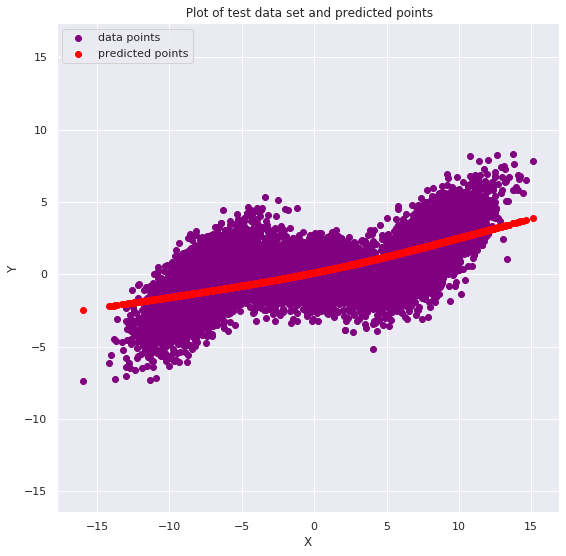

In [36]:
def ploting_pred(data,pre):
  plt.figure(figsize=(9,9))
  plt.scatter(data.T[0,:],data.T[1,:],label='data points',color='purple')
  plt.scatter(data.T[0,:],pre,label='predicted points',color='red')
  plt.axis('equal')
  plt.title(' Plot of test data set and predicted points')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend(loc='upper left')
  plt.show()
ploting_pred(X_2,predict)